<a href="https://colab.research.google.com/github/cfr3yt/cfr3yt.github.io/blob/main/Week_13-1/Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Regression**

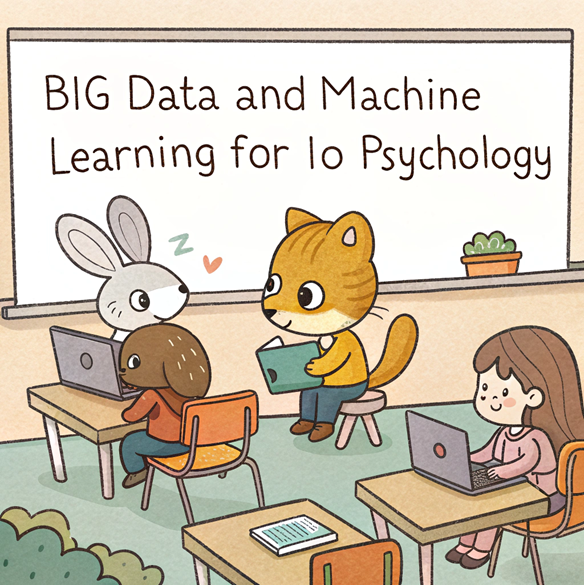

Dr. Philseok Lee @ George Mason University, IO Psy Program

# **1. Import Libraries**

In [ ]:
# Data Preprocessing
import numpy as np
import pandas as pd

# Machine Learning Model Creation, Training, and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV

# Packages for Visualizing Decision Tree Rules
import matplotlib.pyplot as plt
import matplotlib

# **2. Data Generation**

- In this example, we will generate artificial data to apply a regression tree to nonlinear data. The code below shows the process of generating data based on a sine graph.

- Since it is simulation data, it will inevitably overfit to the training data. However, please view this example as serving the purpose of demonstration.

- However, if you use real data instead of simulation data, it can be utilized for your analysis.

In [ ]:
random_state = 2020
n_samples = 1000

np.random.seed(random_state) # random seed

X = np.random.rand(n_samples, 1) * 10  # random uniform number
X = np.sort(X, axis=0) # sort nnumber

y = np.sin(X).reshape(-1, ) + np.random.randn(n_samples) * 0.5

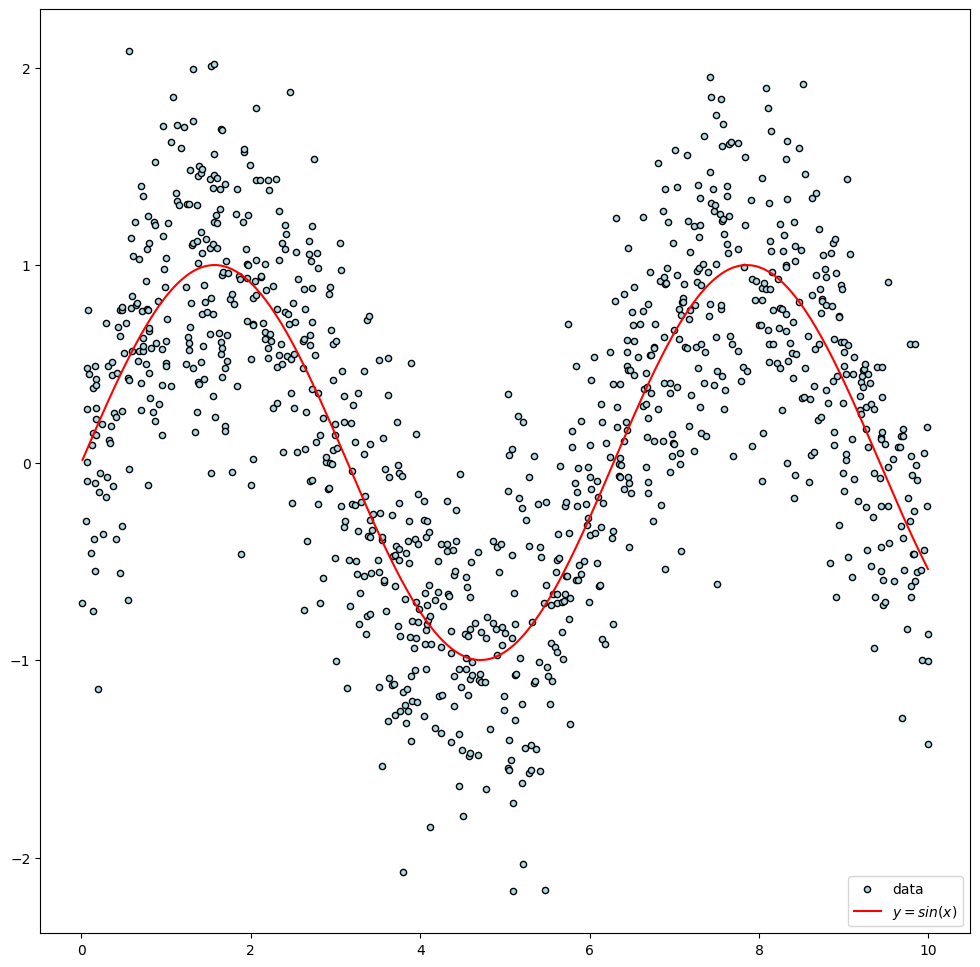

In [ ]:
# Visualization # the goal is to predict the patter of the below image
plt.figure(figsize=(12, 12))
plt.scatter(X, y, s=20, edgecolor='black', c='lightblue', label='data')
plt.plot(X,np.sin(X), c = 'red' , label ='$y=sin(x)$')
plt.legend(loc='lower right')
plt.show()

# **3. Data Split**

In [ ]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(X, #Represents the feature set
                                                    y, #Represents the target variable
                                                    test_size=0.3, #30% of the data goes to the test set, meaning 70% will be used for training.
                                                    random_state=123) #Sets a seed for the random number generator, ensuring reproducibility.
                                                    # Note: removed stratify for regression

# **4. Sorting X_test for visualization**

In [ ]:
# sorting X_test ( for visualization )
sort_idx = np.argsort(X_test,axis=0).reshape(-1)
X_test , y_test = X_test[sort_idx] , y_test[sort_idx]

# **5. Model Training**

In [ ]:
model = DecisionTreeRegressor(max_depth=None) #recursive training and will split everything until it gets the maximum level of homogeneity
model.fit(X_train, y_train)

DecisionTreeRegressor()

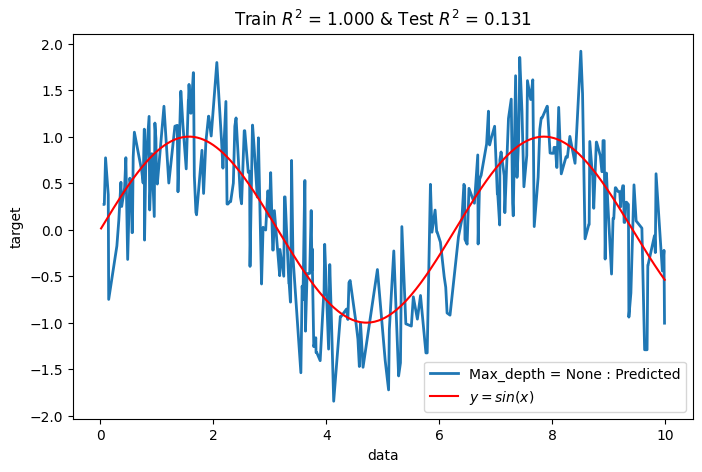

In [ ]:
# test data # below graph is overfitted
y_test_pred = model.predict(X_test)

# visualizataion
plt.figure(figsize=(8, 5))

plt.plot(X_test, y_test_pred, linewidth=2 , label = 'Max_depth = None : Predicted')
plt.plot(X,np.sin(X), c = 'red' , label ='$y=sin(x)$')

plt.xlabel('data')
plt.ylabel('target')
plt.legend(loc='lower right')
train_r2 = r2_score(y_pred=model.predict(X_train) , y_true = y_train)
test_r2 = r2_score(y_pred= y_test_pred, y_true = y_test)
plt.title('Train $R^2$ = {:.3f} & Test $R^2$ = {:.3f}'.format(train_r2, test_r2))
plt.show()

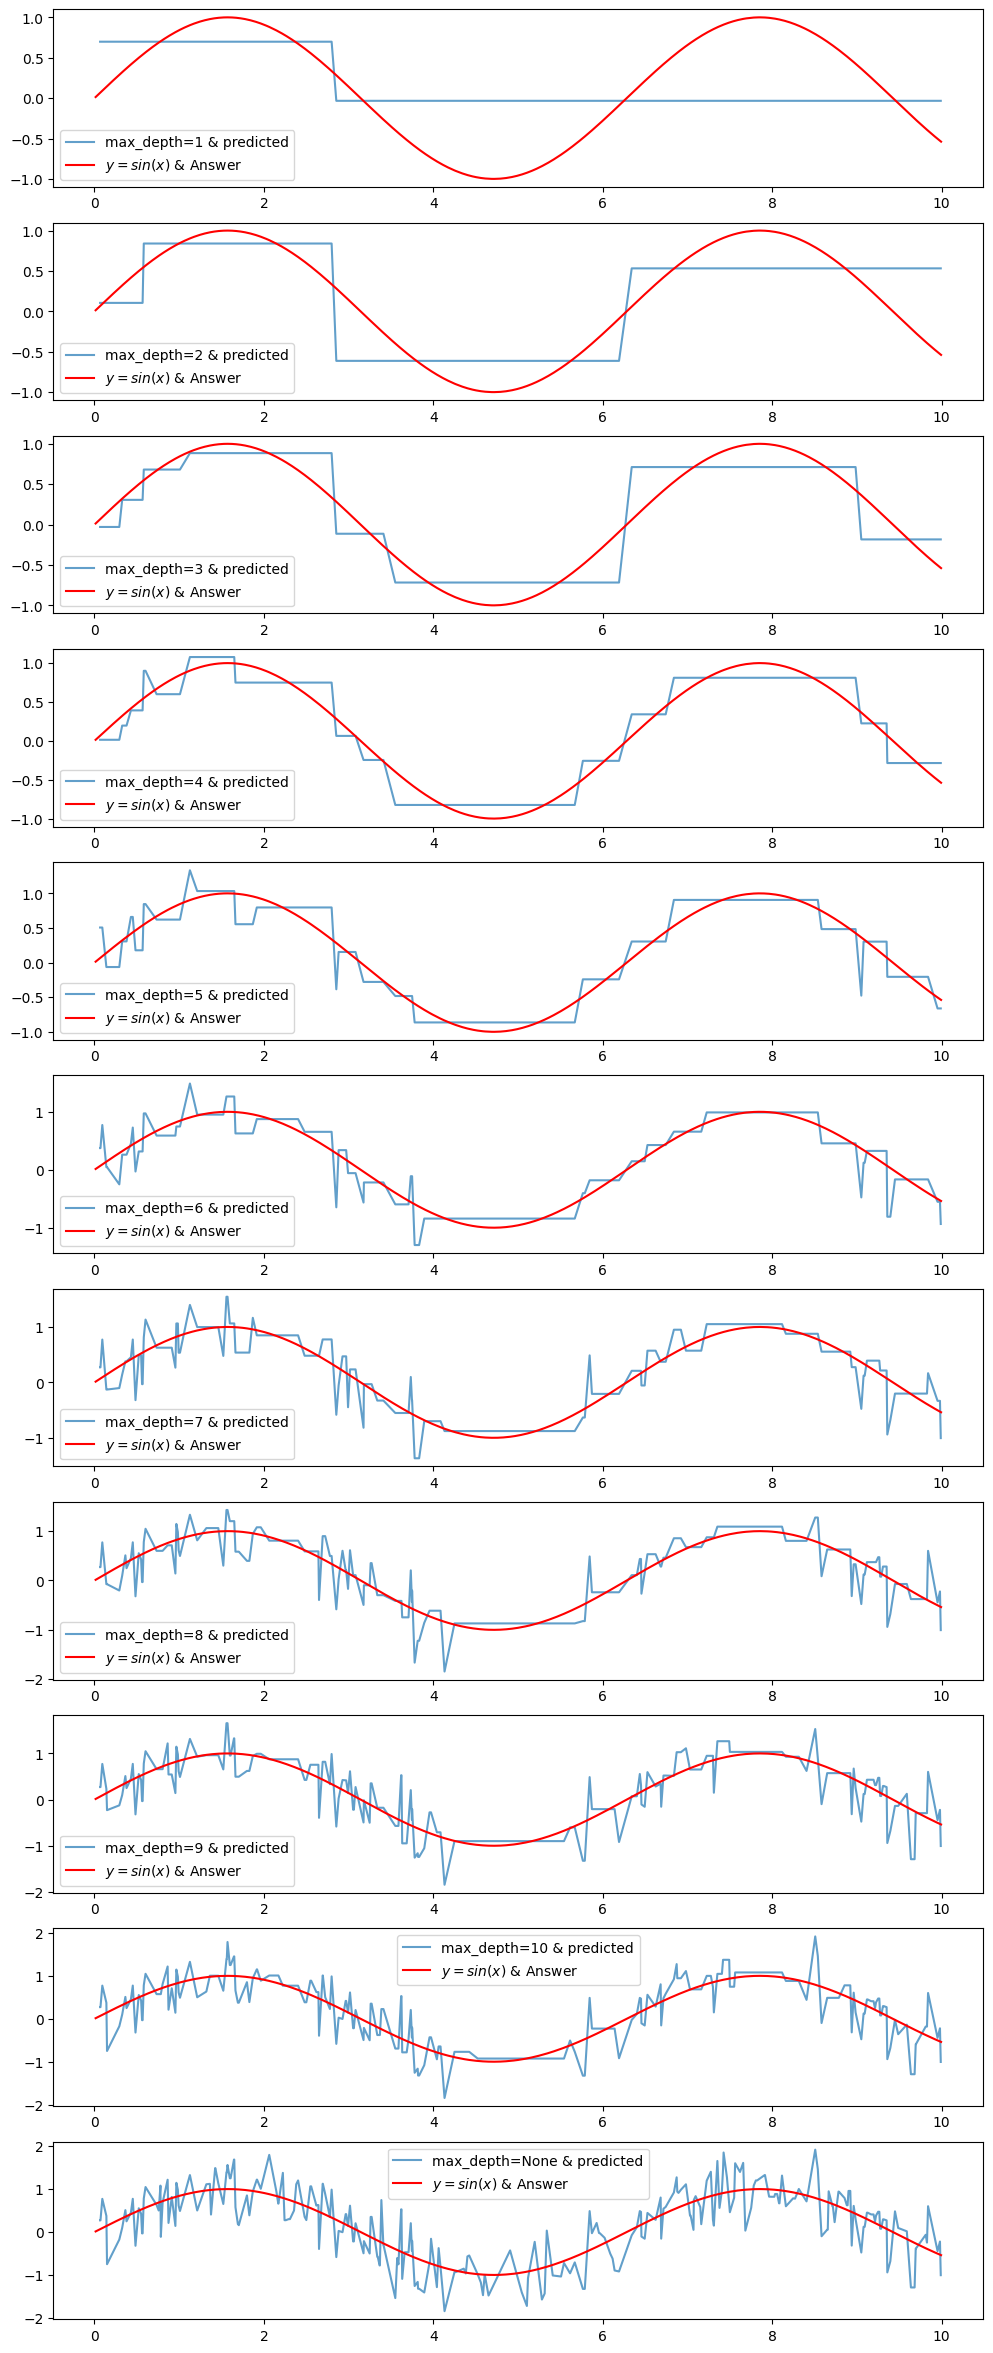

In [ ]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
train_r2 = []
test_r2 = []

fig, axs = plt.subplots(nrows=len(max_depths), ncols=1, figsize=(12, 30))
axs = axs.ravel()


for i, max_depth in enumerate(max_depths):

    # model training
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)

    # prediction
    y_test_pred = model.predict(X_test)

    # plot
    axs[i].plot(X_test, y_test_pred, label='max_depth={} & predicted'.format(max_depth), linewidth=1.5, alpha=0.7)
    axs[i].plot(X,np.sin(X), c = 'red' , label ='$y=sin(x)$ & Answer')

    # record scores
    train_r2.append(r2_score(y_pred=model.predict(X_train) , y_true = y_train) )
    test_r2.append(r2_score(y_pred= y_test_pred, y_true = y_test))

    axs[i].legend()
plt.show()

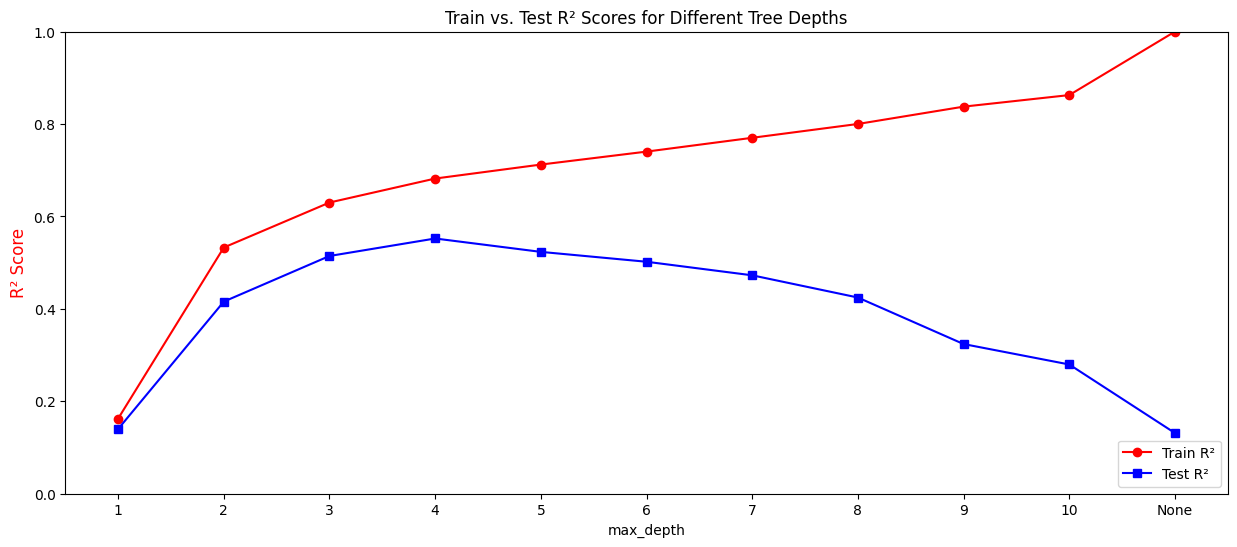

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6)) # the data fits perfectly well to the dataset

xticks = list(map(str, max_depths))

# Plot train R²
ax.plot(range(len(max_depths)), train_r2, color='red', marker='o', label='Train R²')
ax.set_ylabel('Train R²', color='red', fontsize=12)
ax.set_ylim(0, 1)

# Plot test R² on the same y-axis
ax.plot(range(len(max_depths)), test_r2, color='blue', marker='s', label='Test R²')
ax.set_ylabel('R² Score', fontsize=12)  # Shared y-label

# Configure x-axis
plt.xticks(range(len(max_depths)), xticks)
ax.set_xlabel('max_depth')
ax.legend(loc='lower right')

plt.title('Train vs. Test R² Scores for Different Tree Depths')
plt.show()

# **6. Model Testing**

In [ ]:
# Final model evaluation with max_depth
final_model = DecisionTreeRegressor(max_depth=3)
final_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
# Predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

In [ ]:
# Evaluation metrics
train_r2_final = r2_score(y_train, y_train_pred)
test_r2_final = r2_score(y_test, y_test_pred)
train_mse_final = mean_squared_error(y_train, y_train_pred)
test_mse_final = mean_squared_error(y_test, y_test_pred)

In [ ]:
print("Final Model Evaluation (max_depth=4):")
print(f"Train R²: {train_r2_final:.3f}, Test R²: {test_r2_final:.3f}")
print(f"Train MSE: {train_mse_final:.3f}, Test MSE: {test_mse_final:.3f}")

Final Model Evaluation (max_depth=4):
Train R²: 0.630, Test R²: 0.514
Train MSE: 0.255, Test MSE: 0.284


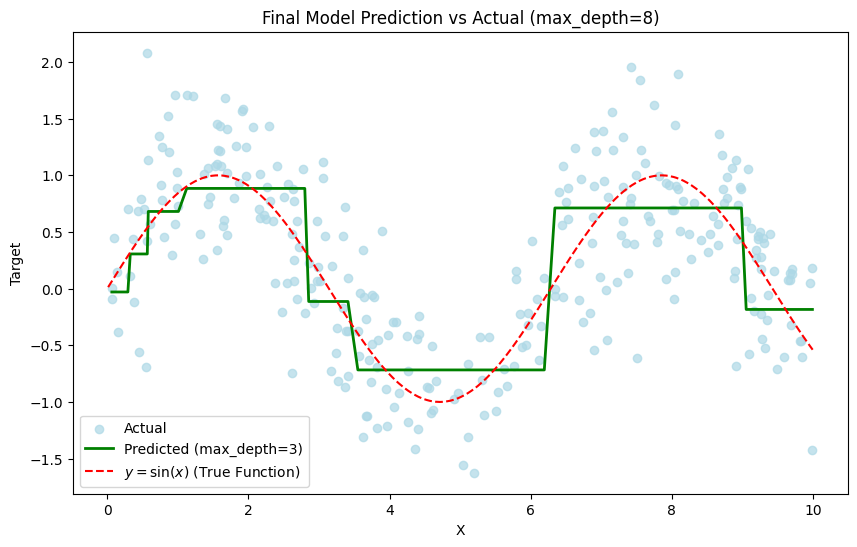

In [ ]:
# Visualization: predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', alpha=0.7, color='lightblue')
plt.plot(X_test, y_test_pred, label='Predicted (max_depth=3)', color='green', linewidth=2)
plt.plot(X, np.sin(X), c='red', linestyle='--', label='$y = \sin(x)$ (True Function)')
plt.xlabel("X")
plt.ylabel("Target")
plt.title("Final Model Prediction vs Actual (max_depth=8)")
plt.legend()
plt.show()

# **7. If you want to further tune the hyper-parameters**


Generally, the most important hyperparameter in a regression tree is max_depth. Therefore, we have primarily focused on max_depth when examining model performance. However, once max_depth is determined, model performance can be further adjusted by specifying additional hyperparameters.

In [ ]:
final_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Import GridSearchCV for systematic hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to explore
param_grid = {
    'max_depth': [3],   # Similar to your current exploration
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],         # Varying minimum samples required to split
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],          # Varying minimum samples required at a leaf node
    # Optionally, you can also try exploring max_features if desired
    'max_features': ['sqrt', 'log2']
}

In [ ]:
# Create the model
dt_reg = DecisionTreeRegressor(random_state=123)

In [ ]:
# Set up GridSearchCV with 5-fold cross-validation using R² as scoring
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [3], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='r2')

In [ ]:
# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation R²:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation R²: 0.5866977973077325


In [ ]:
# Evaluate the best model on the test set
y_test_pred_grid = best_model.predict(X_test)
test_r2_grid = r2_score(y_test, y_test_pred_grid)
test_mse_grid = mean_squared_error(y_test, y_test_pred_grid)

In [ ]:
# Evaluate the best model on the training set to assess overfitting
y_train_pred_grid = best_model.predict(X_train)
train_r2_grid = r2_score(y_train, y_train_pred_grid)
train_mse_grid = mean_squared_error(y_train, y_train_pred_grid)

In [ ]:
# Print evaluation metrics
print("Final Model Evaluation (Best Hyperparameters):")
print(f"Train R²: {train_r2_grid:.3f}, Train MSE: {train_mse_grid:.3f}")
print(f"Test R²: {test_r2_grid:.3f}, Test MSE: {test_mse_grid:.3f}")

Final Model Evaluation (Best Hyperparameters):
Train R²: 0.630, Train MSE: 0.255
Test R²: 0.514, Test MSE: 0.284


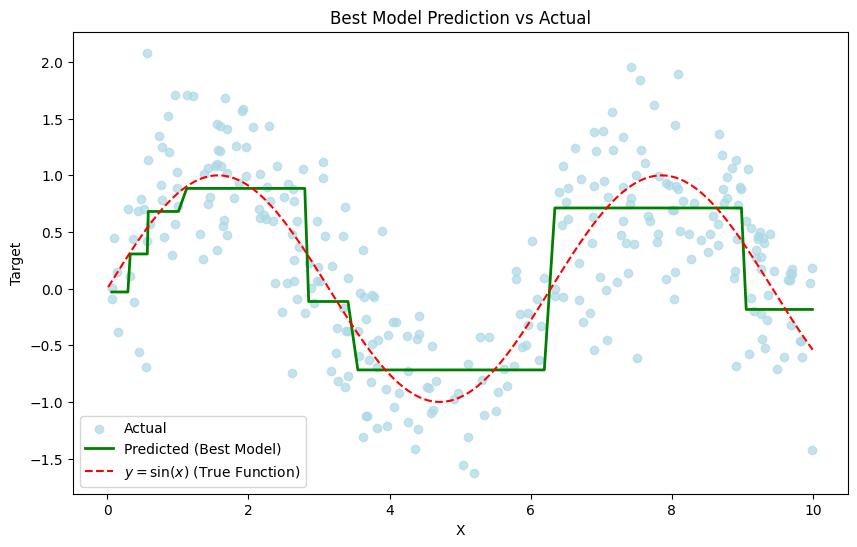

In [ ]:
# Visualizing Predicted vs. Actual values for the best model on the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', alpha=0.7, color='lightblue')
plt.plot(X_test, y_test_pred_grid, label='Predicted (Best Model)', color='green', linewidth=2)
plt.plot(X, np.sin(X), c='red', linestyle='--', label='$y=\sin(x)$ (True Function)')
plt.xlabel("X")
plt.ylabel("Target")
plt.title("Best Model Prediction vs Actual")
plt.legend()
plt.show()